In [1]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [2]:
test_csv = openCSV("../converteddata/data2_1.csv")
test_csv.readCSV()

entry_nr = 26

singular_entry = test_csv.m_data[test_csv.m_data["entry_nr"]==entry_nr]


if singular_entry.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  26  was found in the 'entry_nr' column.


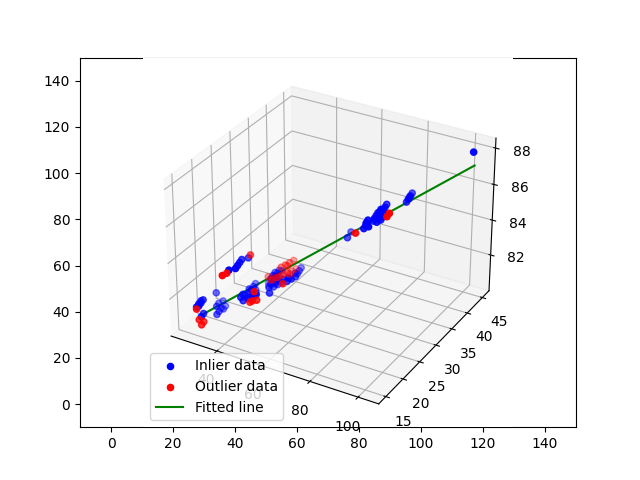

In [32]:
#Use ransac to find the line
%matplotlib widget
features = singular_entry[['x', 'y', 'z']].to_numpy()

model_robust, inliers = ransac(features, LineModelND, min_samples=2,
                               residual_threshold=3, max_trials=1000, random_state=0)
outliers = inliers == False


# plot the inliers and outliers in different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# set limits of all axes
ax.set_xlim(-10, 150)
ax.set_ylim(-10, 150)
ax.set_zlim(-10, 150)

#draw scatter
ax.scatter(features[inliers][:, 0], features[inliers][:, 1], features[inliers][:, 2], c='b', marker='o', label='Inlier data')
ax.scatter(features[outliers][:, 0], features[outliers][:, 1], features[outliers][:, 2], c='r', marker='o', label='Outlier data')

# plot the fitted line in green
line_points = np.linspace(features[inliers].min(axis=0), features[inliers].max(axis=0), num=len(inliers))
xyz_line = model_robust.predict(line_points[:, 0])
ax.plot(xyz_line[:, 0], xyz_line[:, 1], xyz_line[:, 2], c='g', label='Fitted line')



ax.legend(loc='lower left')
plt.show()
